<a href="https://colab.research.google.com/github/ankay212000/Data-Mining-and-Analysis-Practical/blob/main/Exercise8_UE183065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read NIRF data as given in Dataset tab on Google Classroom.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/DMA Datasets

/content/gdrive/My Drive/DMA Datasets


In [23]:
ls

nirf_engg_ranking_india_2020.csv.gsheet  OnlineRetail.csv
nirf_engg_ranking_india_2020.xls


In [207]:
import pandas as pd
dataFileUrl = r"nirf_engg_ranking_india_2020.xls"
names=["institute_id","name","link","tlr","rpc","go","oi","perception","city","state","score","rank"]
data = pd.read_table(dataFileUrl,header=None,names=names)

In [208]:
rows=[]
for i in data["institute_id"].str.split(","):
  rows.append(i)
  

#fixing some rows with errorneous values  
for i in rows:
  if(len(i)==13):
    i[1]=i[1]+","+i[2]
    del i[2]

In [209]:
df=pd.DataFrame(rows,columns=names)
df=df.iloc[1:]
df

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
1,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.9,61.31,100.0,Chennai,Tamil Nadu,89.93,1
2,IR-E-I-1074,Indian Institute of Technology Delhi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
3,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.0,93.37,77.6,49.99,92.51,Mumbai,Maharashtra,85.08,3
4,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
5,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5
...,...,...,...,...,...,...,...,...,...,...,...,...
197,IR-E-C-42227,Dr. D. Y. Patil Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.69,1.66,53.63,48.5,1.63,Pune,Maharashtra,31.15,196
198,IR-E-C-49660,Pimpri Chinchwad College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,46.11,7.36,50.73,48.76,0.55,Pune,Maharashtra,31.13,197
199,IR-E-C-34167,Ramrao Adik Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.6,3.82,45.75,47.25,0.0,Navi Mumbai,Maharashtra,31.11,198
200,IR-E-C-48145,BVRIT Hyderabad,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.16,0.46,53.74,52.98,1.63,Hyderabad,Telangana,31.1,199


# Group the data statewise and Count the number of colleges in each state.

In [210]:
df.groupby(['state']).agg(['count'])['institute_id']

,count
state,
,1
Andhra Pradesh,10
Arunachal Pradesh,2
Assam,3
Bihar,2
Chandigarh,2
Chhattisgarh,1
Delhi,7
Goa,1


#  Sort the records based on rpc attribute (Research Professional practices).

In [211]:
df2=df.sort_values(by=['rpc'])

index=list(range(1,len(df.index)+1))
#print(index)
df2["index"]=index
df2.set_index("index", inplace = True)
df2

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
index,,,,,,,,,,,,
1,IR-E-C-48145,BVRIT Hyderabad,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.16,0.46,53.74,52.98,1.63,Hyderabad,Telangana,31.1,199
2,IR-E-C-1345,P E S College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,59.25,0.71,51.11,54.45,0.0,Mandya,Karnataka,33.65,147
3,IR-E-C-26162,Vasavi College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,48.8,0.75,56.58,50.47,2.16,Hyderabad,Telangana,31.46,187
4,IR-E-C-1398,BNM Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,55.66,1.11,46.87,50.8,0.0,Bengaluru,Karnataka,31.48,186
5,IR-E-C-26905,G.Pulla Reddy Engineering College,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.11,1.15,48.27,51.6,2.69,Kurnool,Andhra Pradesh,31.35,190
...,...,...,...,...,...,...,...,...,...,...,...,...
197,IR-E-C-36975,Government College of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.25,9.94,51.64,53.9,24.15,Coimbatore,Tamil Nadu,37.1,104
198,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.0,93.37,77.6,49.99,92.51,Mumbai,Maharashtra,85.08,3
199,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.9,61.31,100.0,Chennai,Tamil Nadu,89.93,1


# Find the rank of Panjab University as per rpc attribute.

In [212]:
print("Rank of Panjab University based on rpc attribute: ",df2.loc[df2['name'] == "Panjab University"].index[0])

Rank of Panjab University based on rpc attribute:  135


# List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).

In [234]:
rpc_pu=list(df.loc[df['name']=="Panjab University"]['rpc'])
rank_pu=list(df.loc[df['name']=="Panjab University"]['rank'])
rpc_pu=rpc_pu[0]
rank_pu=rank_pu[0]

In [216]:
df.loc[(df['rank'] > rank_pu) & (df['rpc'] < rpc_pu)]

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
73,IR-E-C-1262,B.M.S. College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,62.07,11.92,55.53,52.58,17.79,Bengaluru,Karnataka,40.35,73
75,IR-E-U-0493,National Institute of Technology Agartala,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,57.69,21.55,48.22,55.37,10.27,Agratala,Tripura,39.98,75
76,IR-E-C-6379,Netaji Subhas University of Technology (NSUT),https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.6,22.68,62.41,44.55,13.6,South West,Delhi,39.97,76
77,IR-E-U-0620,National Institute of Technology Goa,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,57.39,18.33,52.11,56.77,11.13,Ponda,Goa,39.93,77
78,IR-E-U-0201,Shri Mata Vaishno Devi University,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,69.41,18.63,41.79,48.0,1.1,Katra,Jammu and Kashmir,39.68,78
79,IR-E-U-0207,National Institute of Technology Jamshedpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,56.64,12.85,64.87,45.15,11.13,Jamshedpur,Jharkhand,39.44,79
80,IR-E-U-0460,Karunya Institute of Technology and Sciences,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,56.5,20.5,50.75,54.83,6.65,Coimbatore,Tamil Nadu,39.4,80
81,IR-E-U-0286,Indian Institute of Information Technology Des...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,45.42,30.89,59.4,43.47,1.63,Jabalpur,Madhya Pradesh,39.29,81
82,IR-E-C-36926,Kumaraguru College of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,63.11,11.35,54.41,45.37,14.79,Coimbatore,Tamil Nadu,39.24,82
83,IR-E-C-36995,Sri Krishna College of Engineering and Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,62.69,4.26,63.05,48.54,12.79,Coimbatore,Tamil Nadu,38.83,83


# Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.

In [222]:
tlr_values=df['tlr'].tolist()

In [224]:
for i in range(len(tlr_values)):
  tlr_values[i]=float(tlr_values[i])

In [228]:
max_tlr=max(tlr_values)
min_tlr=min(tlr_values)
width=(max_tlr-min_tlr)//10
bins=[]

bins.append(min_tlr)
for i in range(1,9):
  bins.append(min_tlr+i*width) 

bins.append(max_tlr)  

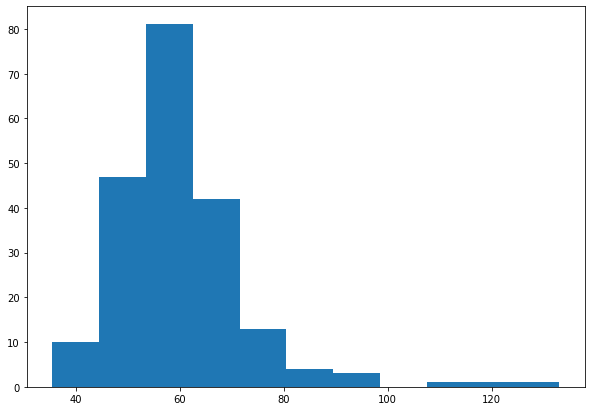

In [233]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(tlr_values, bins = bins)
plt.show()